In [7]:
import random_graph
import subprocess
import statistics
import numpy as np
import matplotlib.pyplot as plt

writing


In [34]:
def run_command(command):
    output = subprocess.run(command.split(" "), stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True) 
    return output.stdout.decode('utf-8')

exec = "../cmake-build-release-gccg/test_ga.exe"
gen_nums = [1, 10, 20, 50, 100, 200, 500, 700, 1000]

gen_data = []

for gen in gen_nums:
    data = {"crossover" : {"simple": {"time" : None, "res": None},
                       "uniform" : {"time" : None, "res": None}},
        "mutation" : {"simple": {"time" : None, "res": None},
                      "inverse": {"time" : None, "res": None},
                      "rotation": {"time" : None, "res": None}},
        "selection" : {"rank": {"time" : None, "res": None},
                       "boltzmann" : {"time" : None, "res": None},
                       "proportional" : {"time" : None, "res": None},
                       "simple" : {"time" : None, "res": None}}}
    for func in data.keys():
        for type in data[func].keys():
            time = 0
            res = 0
            command = exec + " " + str(gen) + " " + func + " " + type
            print(command)
            for i in range(10):
                
                out = run_command(command).split("\r\n")
                sub_time = int(out[0])
                sub_res = int(out[1])
                time += sub_time
                res += sub_res

            data[func][type]["time"] = time / 10
            data[func][type]["res"] = res / 10

    gen_data.append(data)

../cmake-build-release-gccg/test_ga.exe 1 crossover simple
../cmake-build-release-gccg/test_ga.exe 1 crossover uniform
../cmake-build-release-gccg/test_ga.exe 1 mutation simple
../cmake-build-release-gccg/test_ga.exe 1 mutation inverse
../cmake-build-release-gccg/test_ga.exe 1 mutation rotation
../cmake-build-release-gccg/test_ga.exe 1 selection rank
../cmake-build-release-gccg/test_ga.exe 1 selection boltzmann
../cmake-build-release-gccg/test_ga.exe 1 selection proportional
../cmake-build-release-gccg/test_ga.exe 1 selection simple
../cmake-build-release-gccg/test_ga.exe 10 crossover simple
../cmake-build-release-gccg/test_ga.exe 10 crossover uniform
../cmake-build-release-gccg/test_ga.exe 10 mutation simple
../cmake-build-release-gccg/test_ga.exe 10 mutation inverse
../cmake-build-release-gccg/test_ga.exe 10 mutation rotation
../cmake-build-release-gccg/test_ga.exe 10 selection rank
../cmake-build-release-gccg/test_ga.exe 10 selection boltzmann
../cmake-build-release-gccg/test_ga.exe

C:\Users\lviv1\AppData\Local\Temp\ipykernel_25144\3166738309.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  a.set_ylim(0, 80)
C:\Users\lviv1\AppData\Local\Temp\ipykernel_25144\3166738309.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


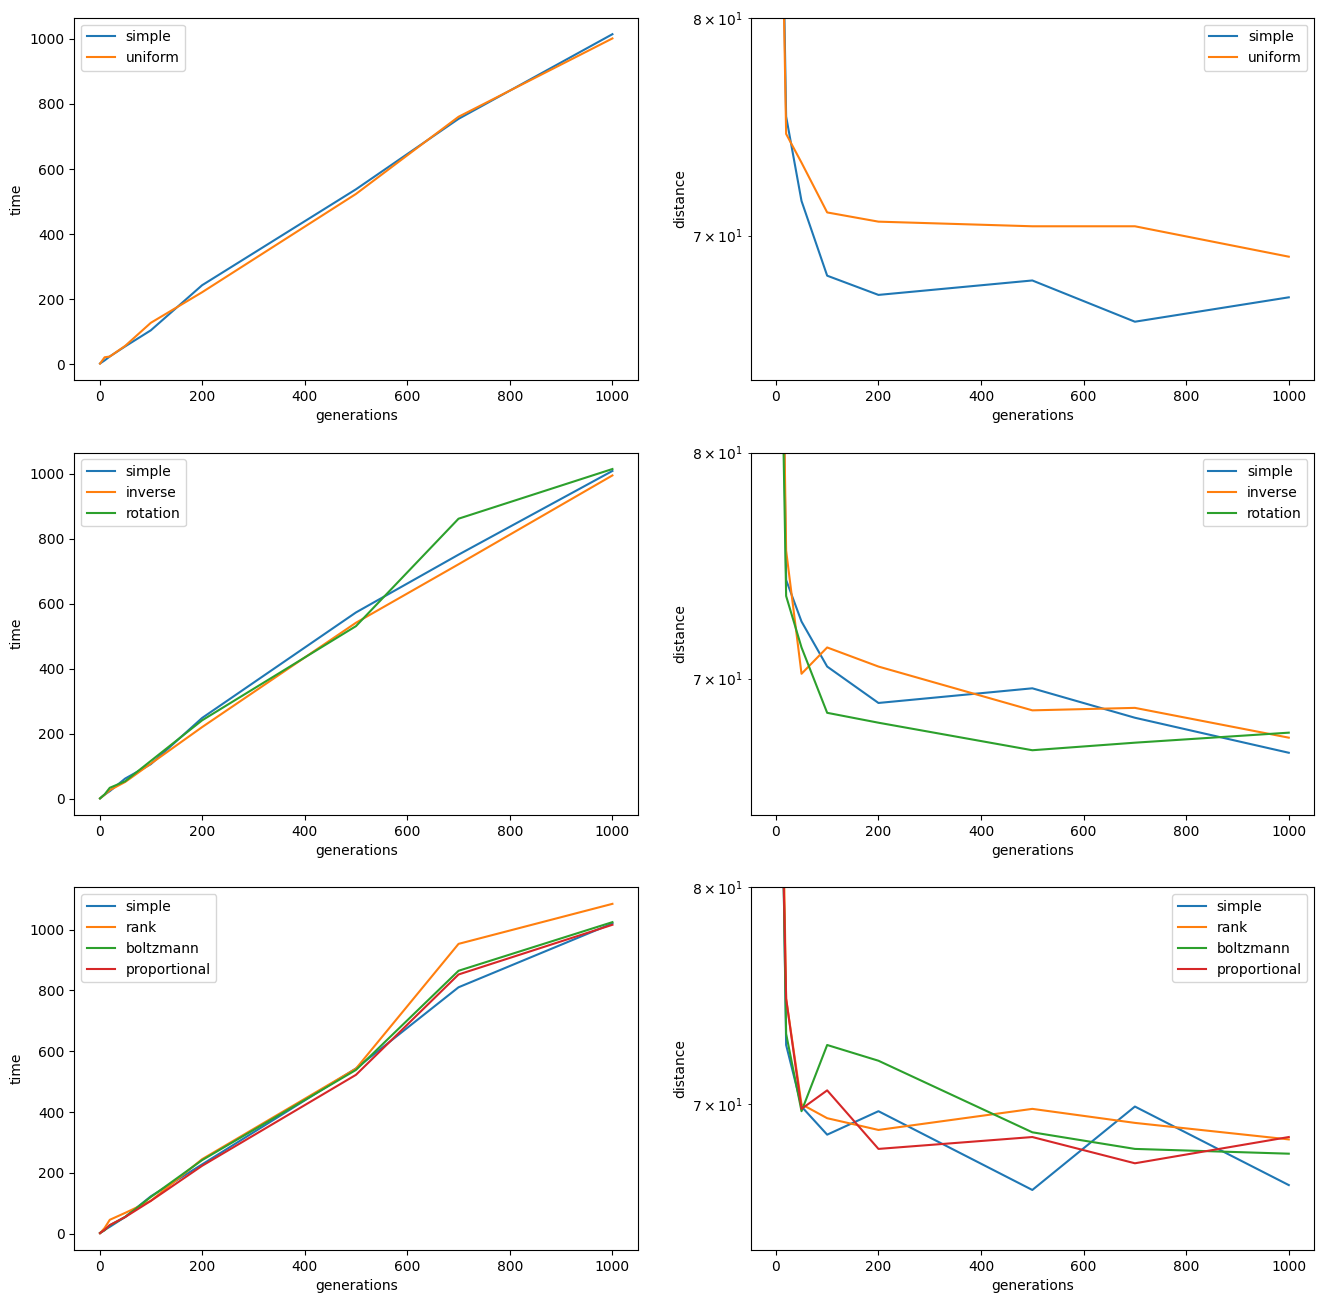

In [65]:
temp = {"crossover" : {"simple": {"time" : None, "result": None},
                       "uniform" : {"time" : None, "result": None}},
        "mutation" : {"simple": {"time" : None, "result": None},
                      "inverse": {"time" : None, "result": None},
                      "rotation": {"time" : None, "result": None}},
        "selection" : {"rank": {"time" : None, "result": None},
                       "boltzmann" : {"time" : None, "result": None},
                       "proportional" : {"time" : None, "result": None},
                       "simple" : {"time" : None, "result": None}}}

func = "crossover"
type = "simple"


data = [cell[func][type]["time"] for cell in gen_data]

figure, axis = plt.subplots(3, 2)
# figure, axis = plt.subplot_mosaic([['crossover time)', 'crossover result)'], ['mutation time)', 'mutation result)'], ['selection time)', 'selection result)']],
                            #   layout='constrained')
figure.set_figheight(16)
figure.set_figwidth(16)
for type in ["simple", "uniform"]:
    axis[0, 0].plot(gen_nums, [cell["crossover"][type]["time"] for cell in gen_data], label = type)
    axis[0, 1].plot(gen_nums, [cell["crossover"][type]["res"] for cell in gen_data], label = type)

for type in ["simple", "inverse", "rotation"]:
    axis[1, 0].plot(gen_nums, [cell["mutation"][type]["time"] for cell in gen_data], label = type)
    axis[1, 1].plot(gen_nums, [cell["mutation"][type]["res"] for cell in gen_data], label = type)

for type in ["simple", "rank", "boltzmann", "proportional"]:
    axis[2, 0].plot(gen_nums, [cell["selection"][type]["time"] for cell in gen_data], label = type)
    axis[2, 1].plot(gen_nums, [cell["selection"][type]["res"] for cell in gen_data], label = type)

for a in axis.ravel()[1::2]: 
    a.set_yscale('log')
    a.set_ylim(0, 80)
    a.set_ylabel("distance")

for a in axis.ravel()[::2]:
    a.set_ylabel("time")

for a in axis.ravel():
    a.set_xlabel("generations")
    a.legend()

figure.show()